# US Accidents analysis

<b>About Dataset:</b>
<br>
<ul>
    <li>This is a countrywide car accident dataset, which covers 49 states of the USA.</li>
<br>
<li>The accident data are collected from February 2016 to Dec 2020, using multiple APIs that provide streaming traffic incident (or event) data.</li>
<br>
<li>These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks.</li> 
<br>
    <li>Currently, there are about <b>3 million accident records</b> in this dataset.</li>
    </ul>

# Import Libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
sns.set_style("darkgrid")

# Import datasets

In [2]:
df=pd.read_csv("US_Accidents_Dec20_Updated.csv")

# Data Preparation and cleaning

In [3]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.400,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.000,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.000,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,3,2018-10-17 16:40:36,2018-10-17 17:10:18,35.348240,-80.847221,35.348240,-80.847221,0.000,Three lanes blocked due to accident on I-77 No...,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,4,2019-12-12 09:48:52,2019-12-12 10:18:05,39.523970,-107.777000,39.565780,-107.516950,14.153,Closed between CO-13/Taughenbaugh Blvd/Exit 90...,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,2,2019-12-21 23:59:00,2019-12-22 00:32:06,34.034017,-118.026972,34.034017,-118.026972,0.000,At CA-60/Pomona Fwy - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
8,A-9,2,2018-05-23 16:50:24,2018-05-23 22:50:24,35.863490,-86.831680,35.849480,-86.832530,0.969,At TN-248/Peytonsville Rd/Exit 61 - Accident. ...,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,2,2019-01-30 08:44:18,2019-01-30 09:14:17,34.426330,-118.585100,34.420220,-118.581900,0.460,At Magic Mountain Pky - Accident. Hard shoulde...,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
ID                       object
Severity                 int64
Start_Time               object
End_Time                 object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description              object
Number                   float64
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction           object
Wind_Speed(mp

In [5]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


 <b> Observation </b>
 <br>
 There is a large difference between starting position count and ending position count which means a lot of accidents were point accidents.
 <br>
 Temperature variationds range between -89F to 67.9F, hence one interesting comparison can be between the number of accidents in colder region vs the warmer region

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

In [7]:
df.isna().sum().sort_values(ascending=False)

Number                   1891672
Precipitation(in)        1301326
Wind_Chill(F)            1183859
Wind_Speed(mph)           307163
End_Lat                   282821
End_Lng                   282821
Visibility(mi)             72078
Weather_Condition          71851
Humidity(%)                71270
Temperature(F)             67224
Wind_Direction             63474
Pressure(in)               56908
Weather_Timestamp          46917
Airport_Code                6608
Timezone                    3430
Zipcode                     1114
Nautical_Twilight            110
Astronomical_Twilight        110
Civil_Twilight               110
Sunrise_Sunset               110
City                         108
Amenity                        0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    0
Turning_Loop                   0
Street    

<b> Percentage of missing values per column </b>

In [8]:
missing_percentages=(df.isna().sum().sort_values(ascending=False)*100)/len(df)
Y=missing_percentages[missing_percentages!=0]
Y

Number                   65.081728
Precipitation(in)        44.771263
Wind_Chill(F)            40.729888
Wind_Speed(mph)          10.567740
End_Lat                   9.730270
End_Lng                   9.730270
Visibility(mi)            2.479796
Weather_Condition         2.471986
Humidity(%)               2.451997
Temperature(F)            2.312797
Wind_Direction            2.183781
Pressure(in)              1.957882
Weather_Timestamp         1.614148
Airport_Code              0.227344
Timezone                  0.118007
Zipcode                   0.038326
Nautical_Twilight         0.003784
Astronomical_Twilight     0.003784
Civil_Twilight            0.003784
Sunrise_Sunset            0.003784
City                      0.003716
dtype: float64

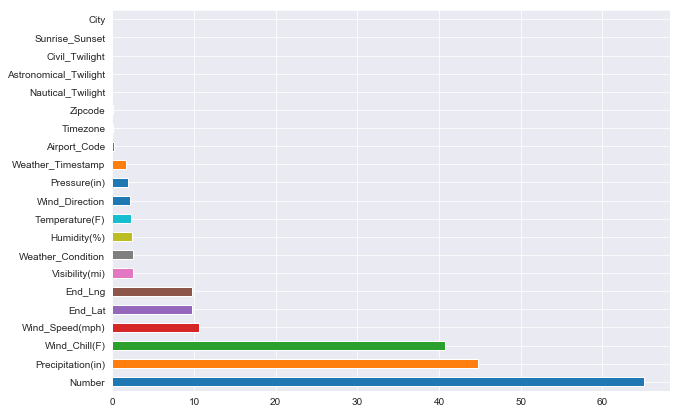

In [9]:
Y.plot.barh(figsize=(10, 7))

# Exploratory Analysis and Visualization

<h3>Based on Cities</h3>

In [10]:
cities=df.City.unique()
len(cities)

11790

This is a large number in terms of count of cities. Hence its better to observe the list of cities where most accidents happen

In [11]:
city_by_accidents=df.City.value_counts()
city_by_accidents

Los Angeles       68411
Houston           68265
Charlotte         56176
Miami             49965
Dallas            48525
Austin            38808
Raleigh           31355
Atlanta           29244
Sacramento        28984
Orlando           28092
Nashville         25277
Baton Rouge       25080
Minneapolis       22469
San Diego         22329
Phoenix           21370
Oklahoma City     21292
Portland          19432
Richmond          18343
Seattle           17384
Saint Paul        17266
San Jose          16744
Chicago           16571
Jacksonville      16210
San Antonio       15751
Denver            14272
Indianapolis      13671
Tucson            13526
Columbia          13326
Greenville        12925
Riverside         12359
                  ...  
Pansey                1
Poplar                1
District 19           1
Colstrip              1
Roxie                 1
Pollok                1
Duck Hill             1
Marvell               1
Guys Mills            1
Barnardsville         1
Valentine       

<b>Top 20</b> cities in terms of number of accidents are:  

In [12]:
city_by_accidents[:20]

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
Austin           38808
Raleigh          31355
Atlanta          29244
Sacramento       28984
Orlando          28092
Nashville        25277
Baton Rouge      25080
Minneapolis      22469
San Diego        22329
Phoenix          21370
Oklahoma City    21292
Portland         19432
Richmond         18343
Seattle          17384
Saint Paul       17266
Name: City, dtype: int64

Most of the cities in the list are in Texas region. However it is very interesting to see that <b>New York despite being the most populated city is not in the list.</b>

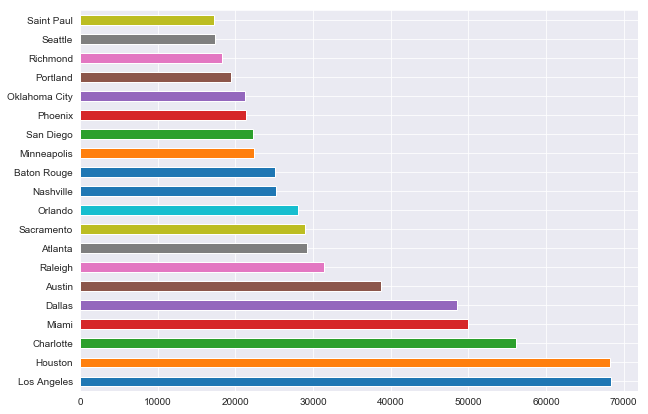

In [13]:
city_by_accidents[:20].plot.barh(figsize=(10, 7))

(array([1.173e+04, 3.400e+01, 9.000e+00, 6.000e+00, 4.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 2.000e+00]),
 array([1.0000e+00, 6.8420e+03, 1.3683e+04, 2.0524e+04, 2.7365e+04,
        3.4206e+04, 4.1047e+04, 4.7888e+04, 5.4729e+04, 6.1570e+04,
        6.8411e+04]),
 <a list of 10 Patch objects>)

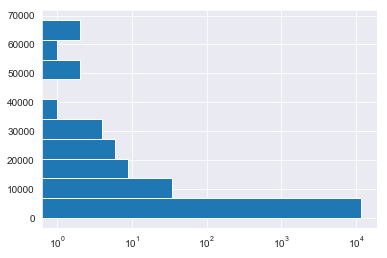

In [14]:
plt.hist(city_by_accidents,log=True,orientation='horizontal')

<b>Most of the cities has very few accidents less than 5000</b>

In [15]:
high_accident_cities=city_by_accidents[city_by_accidents>1000]
(len(high_accident_cities)/len(city_by_accidents))*100

4.3515141233353125

<b>Less than 4.5%</b> cities have accidents more than 1000

(array([459.,  30.,   8.,   6.,   4.,   1.,   0.,   2.,   1.,   2.]),
 array([ 1003. ,  7743.8, 14484.6, 21225.4, 27966.2, 34707. , 41447.8,
        48188.6, 54929.4, 61670.2, 68411. ]),
 <a list of 10 Patch objects>)

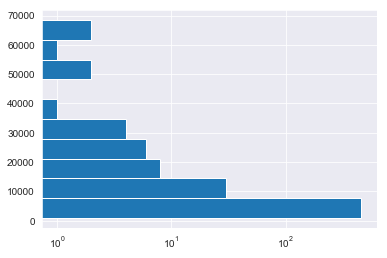

In [16]:
plt.hist(high_accident_cities,log=True,orientation='horizontal')

<b> The distribution of accidents on cities is exponentially decreasing</b>

<h3> Based on Start Time</h3>

In [17]:
df.Start_Time

0          2019-05-21 08:29:55
1          2019-10-07 17:43:09
2          2020-12-13 21:53:00
3          2018-04-17 16:51:23
4          2016-08-31 17:40:49
5          2018-10-17 16:40:36
6          2019-12-12 09:48:52
7          2019-12-21 23:59:00
8          2018-05-23 16:50:24
9          2019-01-30 08:44:18
10         2019-12-20 08:20:12
11         2020-12-17 16:38:09
12         2018-04-19 12:48:57
13         2017-08-16 17:26:10
14         2020-05-27 19:45:37
15         2019-04-11 16:35:14
16         2016-07-09 14:54:01
17         2020-11-21 16:32:00
18         2020-12-10 13:29:00
19         2020-04-18 14:41:08
20         2020-08-22 16:19:52
21         2018-10-03 12:46:52
22         2018-02-15 10:59:40
23         2019-05-17 12:12:20
24         2020-06-25 14:48:35
25         2018-01-31 07:53:12
26         2017-09-07 20:37:46
27         2018-12-21 13:31:29
28         2020-06-15 23:38:00
29         2019-11-25 07:11:55
                  ...         
2906580    2018-04-18 09:03:40
2906581 

<b>We need to change the dtype of this column</b>

In [18]:
df.Start_Time=pd.to_datetime(df.Start_Time)

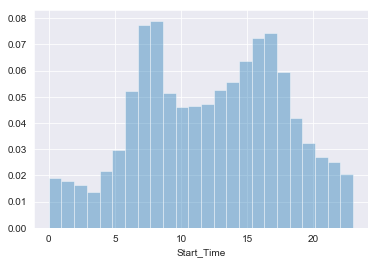

In [19]:
sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False, norm_hist=True)


<b>Most of the accidents happen between 7-9 AM in the morning that is the office hours and in the evening between 3-6 PM for the same reason</b>

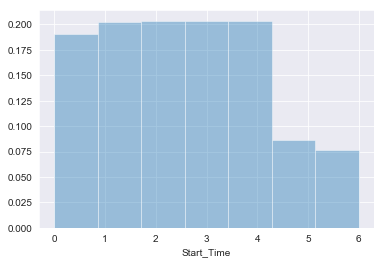

In [20]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

<b>Most of the accidents occur on weekdays and there is a big drop in number of accidents in weekends</b>

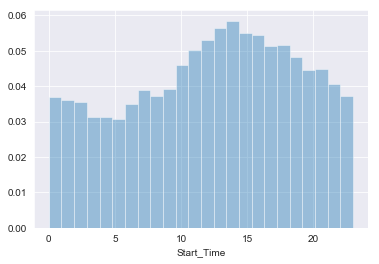

In [21]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

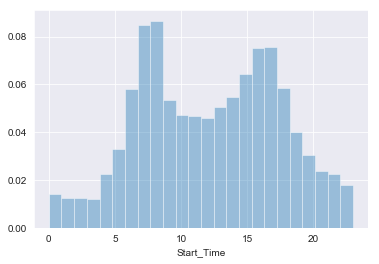

In [22]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(mondays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

<b>This is a pretty interesting observation that the peak hour on weekdays and weekends are different. On sundays, most of the accidents happend in aftwernoon as compared to the mondays.</b>

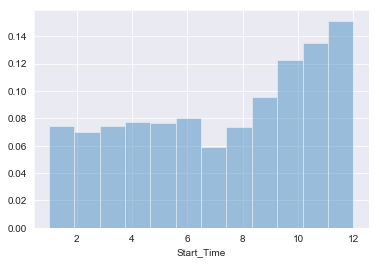

In [23]:
sns.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

<b>It can be seen that most of the accidents happen in the winter season manily october to december. Now the data of january 2016 is missing hence that may be cause for sudden drop</b>

<h3>Based on Start Latitude and Longitude</h3>

In [24]:
df.Start_Lat

0          34.808868
1          35.090080
2          37.145730
3          39.110390
4          26.102942
5          35.348240
6          39.523970
7          34.034017
8          35.863490
9          34.426330
10         28.021709
11         40.912210
12         32.866930
13         32.265141
14         41.059820
15         29.723339
16         34.103172
17         34.186595
18         42.501929
19         41.556862
20         33.918056
21         35.596561
22         29.640491
23         37.406910
24         40.912200
25         37.994461
26         32.871090
27         30.426109
28         33.774159
29         43.220390
             ...    
2906580    39.836807
2906581    38.507589
2906582    37.238208
2906583    38.803547
2906584    29.197100
2906585    38.955147
2906586    33.981899
2906587    33.539391
2906588    35.934559
2906589    34.231285
2906590    37.676400
2906591    41.785073
2906592    32.445023
2906593    30.288995
2906594    42.309641
2906595    34.598988
2906596    44

In [25]:
df.Start_Lng

0          -82.269157
1          -80.745560
2         -121.985052
3         -119.773781
4          -80.265091
5          -80.847221
6         -107.777000
7         -118.026972
8          -86.831680
9         -118.585100
10         -82.203583
11         -73.875099
12         -96.666170
13        -110.903587
14         -74.250920
15         -95.497337
16        -118.249969
17        -117.439427
18         -82.918056
19         -73.779556
20         -84.338028
21         -78.759743
22         -95.482445
23         -79.913933
24         -73.884610
25        -122.069885
26         -80.010628
27         -97.753906
28        -118.049783
29         -85.500961
              ...    
2906580    -86.247368
2906581   -121.458229
2906582   -121.762061
2906583   -123.585434
2906584    -82.251602
2906585    -76.721092
2906586   -118.191948
2906587    -80.862411
2906588    -86.818649
2906589   -118.266190
2906590   -122.109800
2906591    -86.139762
2906592    -93.780357
2906593    -82.859219
2906594   

In [26]:
sample_df = df.sample(int(0.1 * len(df)))

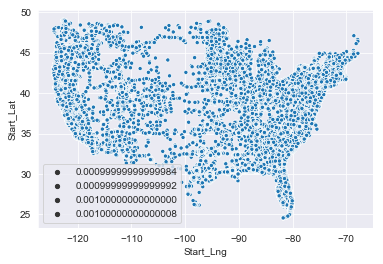

In [27]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

<b>Most of the accidents occur in the eastern states of US</b>

In [28]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [29]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

<b>This gives us a much cleaner picture regarding the count distribution of accidents</b>

<h3>Based on Severity</b>

In [30]:
sever = df.groupby('Severity').count()
sever

,ID,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
Severity,,,,,,,,,,,,,,,,,,,,,
1,28751,28751,28751,28751,28751,28657,28657,28751,28751,12836,...,28751,28751,28751,28751,28751,28751,28748,28748,28748,28748
2,2129263,2129263,2129263,2129263,2129263,1979369,1979369,2129263,2129263,891059,...,2129263,2129263,2129263,2129263,2129263,2129263,2129186,2129186,2129186,2129186
3,629452,629452,629452,629452,629452,500643,500643,629452,629452,58428,...,629452,629452,629452,629452,629452,629452,629442,629442,629442,629442
4,119144,119144,119144,119144,119144,115120,115120,119144,119144,52615,...,119144,119144,119144,119144,119144,119144,119124,119124,119124,119124


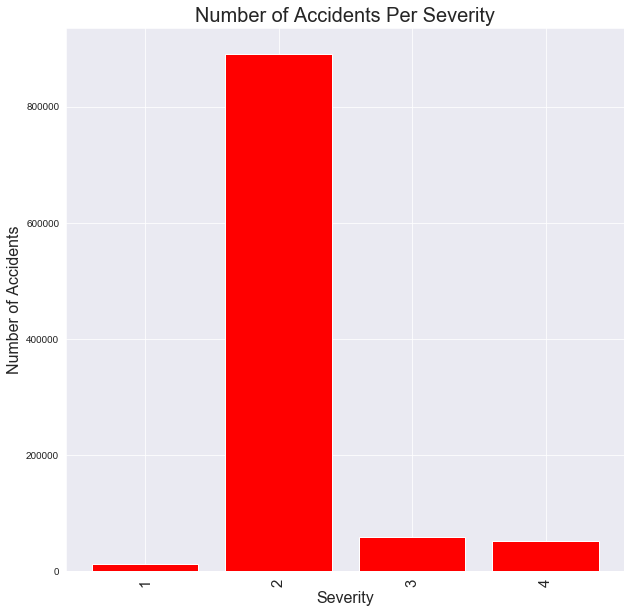

In [31]:
plt.figure(figsize=(10, 10))
plt.title('Number of Accidents Per Severity',fontsize=20)
plt.bar(sever.index, sever.Number, color='r')
plt.xlabel('Severity',fontsize=16)
plt.ylabel('Number of Accidents',fontsize=16)
plt.xticks(sever.index, rotation='vertical', size=15)
plt.show()

<b>Most of the accidents that occur were of severity 2</b>

<h3>Based on States</h3>

In [32]:
state_wise_counts = df.groupby('State')['ID'].count().reset_index()

In [33]:
state_wise_counts.shape

(49, 2)

<b>There are 49 states</b>

In [34]:
state_wise_counts = state_wise_counts.sort_values(by = "ID",ascending=False)

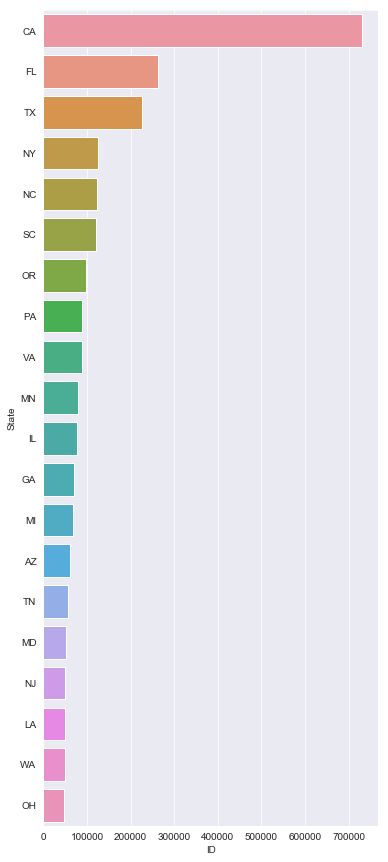

In [35]:
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(y="State", x="ID", data=state_wise_counts[:20])

<b>It can be seen that California tops the list followed by florida, texas and New York. Hence it is clear that states with high population have higher accident count.</b>